# PROJET 7
***

## 1 - ANALYSE EXPLORATOIRE DES DONNEES
***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandarallel import pandarallel

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import os
import time
from IPython.display import display

In [2]:
pandarallel.initialize(progress_bar = True, nb_workers = 12)

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
df_list = []

for file in os.listdir('./csv_files/'):
    print('-'* 100)
    try:
        file_lower = file.lower().replace('.csv', '')  # Convertir le nom du fichier en minuscule
        # Lecture du fichier CSV avec un encodage spécifique
        data = pd.read_csv(f"./csv_files/{file}", sep=',', encoding='ISO-8859-1')

        #generation du nom
        name = f"data_{file_lower}"

        #passage en variable globale
        globals()[name] = data

        df_list.append(name)
        
        #on confirme le succes
        print(f"Le fichier '{file}' a été lu avec succès.")
        print(f"Dataframe ==> {name}")
        print(f"Dimensions : {data.shape}")
        print('-' * 100)
        #display(data.head())
        print('\n')
        #print('_' * 100)
        
    except UnicodeDecodeError as e:
        print(f"Erreur d'encodage lors de la lecture du fichier '{file}': {e}")
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier '{file}': {e}")

----------------------------------------------------------------------------------------------------
Le fichier 'bureau.csv' a été lu avec succès.
Dataframe ==> data_bureau
Dimensions : (1716428, 17)
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Le fichier 'previous_application.csv' a été lu avec succès.
Dataframe ==> data_previous_application
Dimensions : (1670214, 37)
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Le fichier 'bureau_balance.csv' a été lu avec succès.
Dataframe ==> data_bureau_balance
Dimensions : (27299925, 3)
----------------------------------------------------------------------------------------------------


-----------------------------------------------

In [4]:
#une fonction pour afficher les valeurs manquantes

def missing_values_df(dataframe, n):

    missing_values_count = dataframe.isnull().sum().sort_values(ascending = False)
    missing_values_percent = (dataframe.isnull().mean() * 100).sort_values(ascending = False)

    missing_data = pd.DataFrame({'Variable': missing_values_count.index, 'Valeurs manquantes': missing_values_count, 'Valeurs manquantes (%)': round(missing_values_percent, 2)})
    missing_data.reset_index(drop = True)

    print('-'*50)
    print(f"Le dataframe possède {dataframe.shape[1]} colonnes.")
    print(f"Il y a {missing_values_count.shape[0]} colonnes qui ont des valeurs manquantes.")
    print(f"Vous affichez les {n} premières.")
    print('-'*50)

    
    
    display(missing_data.iloc[:n,:])

In [5]:
#on se concentre sur train et test

data_train = data_application_train
data_test = data_application_test

In [6]:
#On affiche les 20 variables ayant le plus de valeurs manquantes.

missing_values_df(data_train, 20)

--------------------------------------------------
Le dataframe possède 122 colonnes.
Il y a 122 colonnes qui ont des valeurs manquantes.
Vous affichez les 20 premières.
--------------------------------------------------


,Variable,Valeurs manquantes,Valeurs manquantes (%)
COMMONAREA_MEDI,COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MEDI,210199,68.35


In [7]:
#type de colonnes

data_application_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [8]:
data_application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

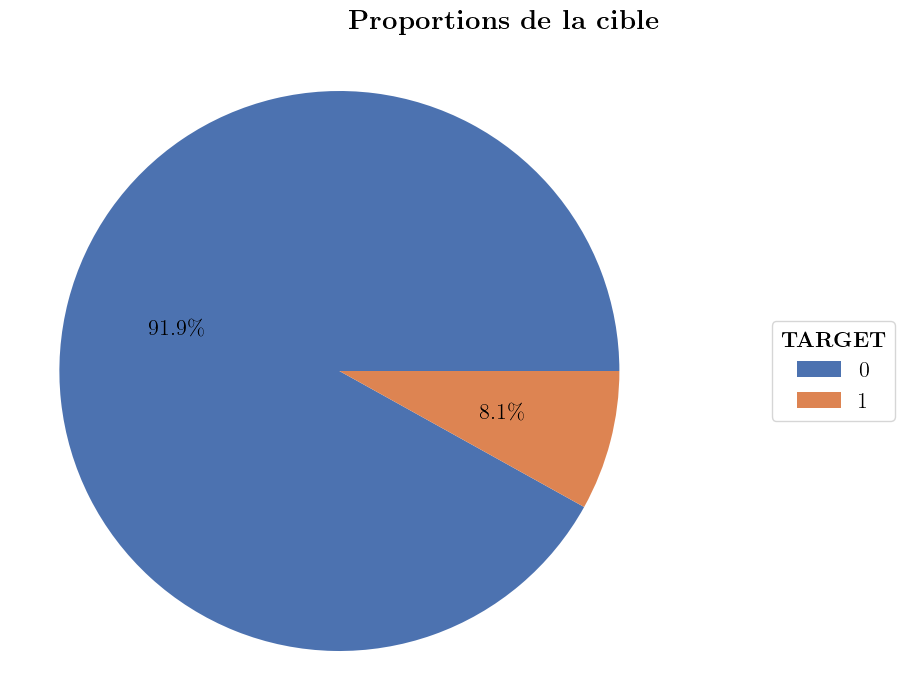

In [10]:
#On affiche les proportions des cibles.

plt.figure(figsize = (8.5,8))

palette = sns.color_palette('deep')
proportions = data_train['TARGET'].value_counts(normalize = True).sort_values(ascending = False)

wedges, texts, autotexts = plt.pie(proportions, labels = None, autopct='%1.1f%%', colors = palette)

plt.legend(wedges, proportions.index, title = '\\textbf{{TARGET}}', loc = 'center', bbox_to_anchor = (1,0,0.5,1))
plt.title('\\textbf{{Proportions de la cible}}',size = 20, pad = 25)
plt.gca().title.set_position([0.75, 1.05])

plt.axis('equal')
#plt.savefig(f"./graphics/pieplot_categories.pdf", bbox_inches='tight')
plt.show()

In [11]:
#on encode les variables catégorielles

label_encoder = LabelEncoder()
nb_encoded = 0
list_colonnes = []

for colonne in data_train:
    if data_train[colonne].dtype == 'object' and len(data_train[colonne].unique()) <= 2:
        label_encoder.fit(data_train[colonne])

        #on encode
        data_train[colonne] = label_encoder.transform(data_train[colonne])
        data_test[colonne] = label_encoder.transform(data_test[colonne])

        #on incrémente
        nb_encoded += 1
        list_colonnes.append(colonne)
        
print('-'*50)
print(f"Nombres de colonnes encodées : {nb_encoded}")
print(f"Colonnes encodées :")
print(", ".join(map(str, list_colonnes)))
print('-' * 50)

--------------------------------------------------
Nombres de colonnes encodées : 3
Colonnes encodées :
NAME_CONTRACT_TYPE, FLAG_OWN_CAR, FLAG_OWN_REALTY
--------------------------------------------------


In [12]:
#on encode le reste avec onehotencoder

data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [13]:
#on aligne les deux dataframes

labels_train = data_train['TARGET']

data_train, data_test = data_train.align(data_test, join = 'inner', axis = 1)

#on remet la target
data_train['TARGET'] = labels_train

print('-'*40)
print(f"Taille du jeu d'entraînement : {data_train.shape}")
print(f"Taille du jeu de test : {data_test.shape}")
print('-'*40)

----------------------------------------
Taille du jeu d'entraînement : (307511, 240)
Taille du jeu de test : (48744, 239)
----------------------------------------


In [14]:
data_train.dtypes.value_counts()

bool       131
float64     65
int64       44
Name: count, dtype: int64

In [15]:
#on recupere les colonnes numériques

list_col_float = []
list_col_int = []

for colonne in data_train:
    if data_train[colonne].dtype == 'float64':
        list_col_float.append(colonne)

    elif data_train[colonne].dtype == 'int64':
        list_col_int.append(colonne)

In [16]:
#on instancie

data_train_float = data_train[list_col_float]
data_train_int = data_train[list_col_int]

print('-' * 90)
print(f"Dimensions du data  'FLOAT' : {data_train_float.shape[0]} lignes, {data_train_float.shape[1]} colonnes")
print(f"Dimensions du data  'INT' : {data_train_int.shape[0]} lignes, {data_train_int.shape[1]} colonnes")
print('-' * 90)

------------------------------------------------------------------------------------------
Dimensions du data  'FLOAT' : 307511 lignes, 65 colonnes
Dimensions du data  'INT' : 307511 lignes, 44 colonnes
------------------------------------------------------------------------------------------


In [17]:
list_indice = [0, 16, 32, 48, 65]

In [18]:
#on affiche les .describe

list_indice_float = [0, 16, 32, 48, 65]

for i in range(len(list_indice_float[:-1])):
    
    start = list_indice_float[i]
    end = list_indice_float[i + 1]
    
    print('-' * 40)
    print(f"Pour DATA TRAIN FLOAT : Colonnes {start} à {end}")
    print('-' * 40)
    display(data_train_float.iloc[:,start:end].describe())

----------------------------------------
Pour DATA TRAIN FLOAT : Colonnes 0 à 16
----------------------------------------


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,104582.000000,307509.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-4986.120328,12.061091,2.152665,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,3522.886321,11.944812,0.910682,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-24672.000000,0.000000,1.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-7479.500000,5.000000,2.000000,0.334007,3.924574e-01,0.370650,0.05770,0.044200,0.976700,0.687200,0.007800
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-4504.000000,9.000000,2.000000,0.505998,5.659614e-01,0.535276,0.08760,0.076300,0.981600,0.755200,0.021100
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-2010.000000,15.000000,3.000000,0.675053,6.636171e-01,0.669057,0.14850,0.112200,0.986600,0.823200,0.051500
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,0.000000,91.000000,20.000000,0.962693,8.549997e-01,0.896010,1.00000,1.000000,1.000000,1.000000,1.000000


----------------------------------------
Pour DATA TRAIN FLOAT : Colonnes 16 à 32
----------------------------------------


,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE
count,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000
mean,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193
std,0.134576,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,0.047732,0.069523,0.107936,0.084307,0.064575,0.110111,0.074445,0.132256,0.100977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.069000,0.166700,0.083300,0.018700,0.050400,0.045300,0.000000,0.000000,0.052500,0.040700,0.976700,0.699400,0.007200,0.000000,0.069000
50%,0.000000,0.137900,0.166700,0.208300,0.048100,0.075600,0.074500,0.000000,0.003600,0.084000,0.074600,0.981600,0.764800,0.019000,0.000000,0.137900
75%,0.120000,0.206900,0.333300,0.375000,0.085600,0.121000,0.129900,0.003900,0.027700,0.143900,0.112400,0.986600,0.823600,0.049000,0.120800,0.206900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


----------------------------------------
Pour DATA TRAIN FLOAT : Colonnes 32 à 48
----------------------------------------


,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI
count,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000
mean,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625
std,0.143709,0.161160,0.081750,0.097880,0.111845,0.046276,0.070254,0.109076,0.082179,0.059897,0.112066,0.076144,0.134467,0.100368,0.145067,0.161934
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166700,0.083300,0.016600,0.054200,0.042700,0.000000,0.000000,0.058300,0.043700,0.976700,0.691400,0.007900,0.000000,0.069000,0.166700,0.083300
50%,0.166700,0.208300,0.045800,0.077100,0.073100,0.000000,0.001100,0.086400,0.075800,0.981600,0.758500,0.020800,0.000000,0.137900,0.166700,0.208300
75%,0.333300,0.375000,0.084100,0.131300,0.125200,0.003900,0.023100,0.148900,0.111600,0.986600,0.825600,0.051300,0.120000,0.206900,0.333300,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


----------------------------------------
Pour DATA TRAIN FLOAT : Colonnes 48 à 65
----------------------------------------


,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.018700,0.051300,0.045700,0.000000,0.000000,0.041200,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.048700,0.076100,0.074900,0.000000,0.003100,0.068800,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.086800,0.123100,0.130300,0.003900,0.026600,0.127600,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [19]:
#on affiche les .describe

list_indice_int = [0, 11, 22, 33, 44]

for i in range(len(list_indice_int[:-1])):
    
    start = list_indice_int[i]
    end = list_indice_int[i + 1]
    
    print('-' * 40)
    print(f"Pour DATA TRAIN INT : Colonnes {start} à {end}")
    print('-' * 40)
    display(data_train_int.iloc[:,start:end].describe())

----------------------------------------
Pour DATA TRAIN INT : Colonnes 0 à 11
----------------------------------------


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.095213,0.340108,0.693673,0.417052,-16036.995067,63815.045904,-2994.202373,0.999997,0.819889,0.199368
std,102790.175348,0.293509,0.473746,0.460968,0.722121,4363.988632,141275.766519,1509.450419,0.001803,0.384280,0.399526
min,100002.000000,0.000000,0.000000,0.000000,0.000000,-25229.000000,-17912.000000,-7197.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,-19682.000000,-2760.000000,-4299.000000,1.000000,1.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.000000,0.000000,-15750.000000,-1213.000000,-3254.000000,1.000000,1.000000,0.000000
75%,367142.500000,0.000000,1.000000,1.000000,1.000000,-12413.000000,-289.000000,-1720.000000,1.000000,1.000000,0.000000
max,456255.000000,1.000000,1.000000,1.000000,19.000000,-7489.000000,365243.000000,0.000000,1.000000,1.000000,1.000000


----------------------------------------
Pour DATA TRAIN INT : Colonnes 11 à 22
----------------------------------------


,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.998133,0.281066,0.056720,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454
std,0.043164,0.449521,0.231307,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000


----------------------------------------
Pour DATA TRAIN INT : Colonnes 22 à 33
----------------------------------------


,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.179555,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912
std,0.383817,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


----------------------------------------
Pour DATA TRAIN INT : Colonnes 33 à 44
----------------------------------------


,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
count,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.080729
std,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.272419
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#la colonne DAYS_EMPLOYED pose problème

data_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [21]:
print('-' * 100)
print(f"Nombre de valeurs positives : {data_train.loc[data_train['DAYS_EMPLOYED'] > 0, :].shape[0]} sur {data_train.shape[0]}, soit {round((data_train.loc[data_train['DAYS_EMPLOYED'] > 0, :].shape[0] / data_train.shape[0]) * 100)}%")
print(f"Valeurs uniques positives : {', '.join(map(str, data_train.loc[data_train['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'].unique()))}")
print('-' * 100)

----------------------------------------------------------------------------------------------------
Nombre de valeurs positives : 55374 sur 307511, soit 18%
Valeurs uniques positives : 365243
----------------------------------------------------------------------------------------------------


In [22]:
data_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [23]:
data_test.loc[data_test['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'].describe()

count      9274.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [24]:
#on cree une colonne DAYS_EMPLOYED_ANOMALY pour repérer avant de supprimer les valeurs aberrantes

data_train['DAYS_EMPLOYED_ANOMALY'] = (data_train['DAYS_EMPLOYED'] > 0).astype(int)
data_test['DAYS_EMPLOYED_ANOMALY'] = (data_test['DAYS_EMPLOYED'] > 0).astype(int)

In [25]:
#on remplace les valeurs aberrantes par NaN

data_train.loc[data_train['DAYS_EMPLOYED_ANOMALY'] == 1, 'DAYS_EMPLOYED'] = np.nan
data_test.loc[data_test['DAYS_EMPLOYED_ANOMALY'] == 1, 'DAYS_EMPLOYED'] = np.nan

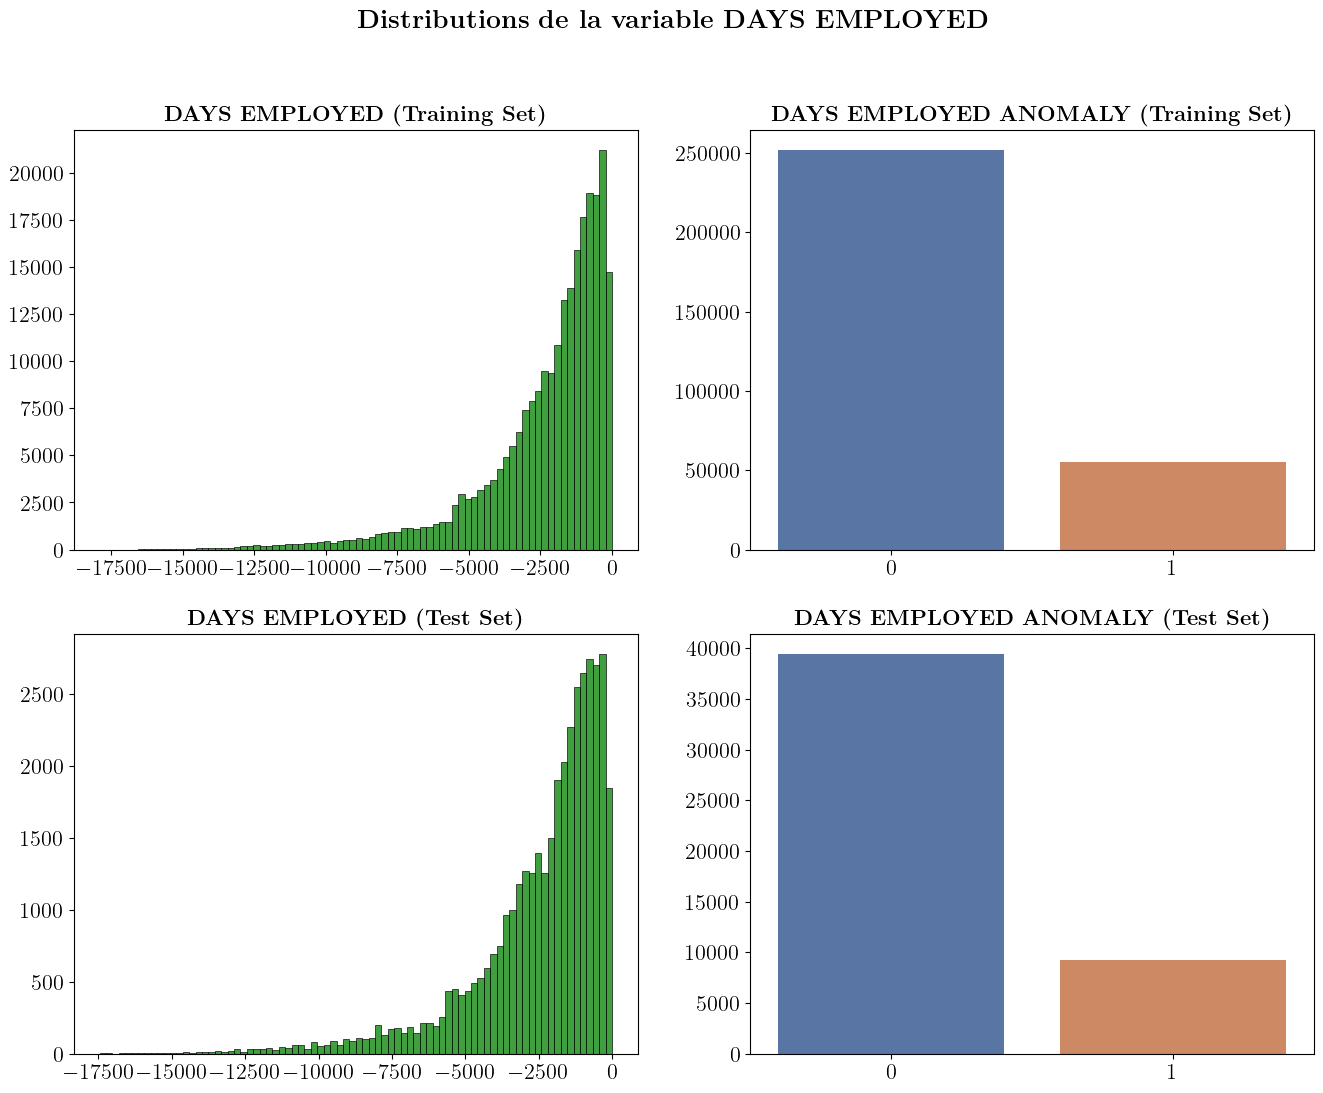

In [26]:
#on plot

fig, axes = plt.subplots(2,2, figsize = (16,12), gridspec_kw={'width_ratios':[1,1]})

sns.histplot(data_train['DAYS_EMPLOYED'], color = 'green', bins = 80, ax = axes[0, 0])
sns.barplot(x = data_train['DAYS_EMPLOYED_ANOMALY'].value_counts().index, 
            y = data_train['DAYS_EMPLOYED_ANOMALY'].value_counts(),
            hue = data_train['DAYS_EMPLOYED_ANOMALY'].unique(),
            legend = False,
            palette = 'deep', ax = axes[0, 1])

sns.histplot(data_test['DAYS_EMPLOYED'], color = 'green', bins = 80, ax = axes[1, 0])
sns.barplot(x = data_test['DAYS_EMPLOYED_ANOMALY'].value_counts().index,
            y = data_test['DAYS_EMPLOYED_ANOMALY'].value_counts(), 
            hue = data_test['DAYS_EMPLOYED_ANOMALY'].unique(),
            legend = False,
            palette = 'deep', ax = axes[1, 1])

for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        ax.set_xlabel('')
        ax.set_ylabel('')

axes[0, 0].set_title(f"\\textbf{{DAYS EMPLOYED (Training Set)}}", size = 16)
axes[0, 1].set_title(f"\\textbf{{DAYS EMPLOYED ANOMALY (Training Set)}}", size = 16)
axes[1, 0].set_title(f"\\textbf{{DAYS EMPLOYED (Test Set)}}", size = 16)
axes[1, 1].set_title(f"\\textbf{{DAYS EMPLOYED ANOMALY (Test Set)}}", size = 16)

plt.suptitle(f"\\textbf{{Distributions de la variable DAYS EMPLOYED}}")

plt.show()

In [27]:
#on affiche les corrélations avec la cible
data_train_corr = data_train.corr()['TARGET'].sort_values()

In [28]:
#on prepare les données pour le plot
data_corr_pos = data_train_corr.iloc[-11:-1].sort_values(ascending = False)
data_corr_neg = (-data_train_corr.iloc[0:10]).sort_values(ascending = False)

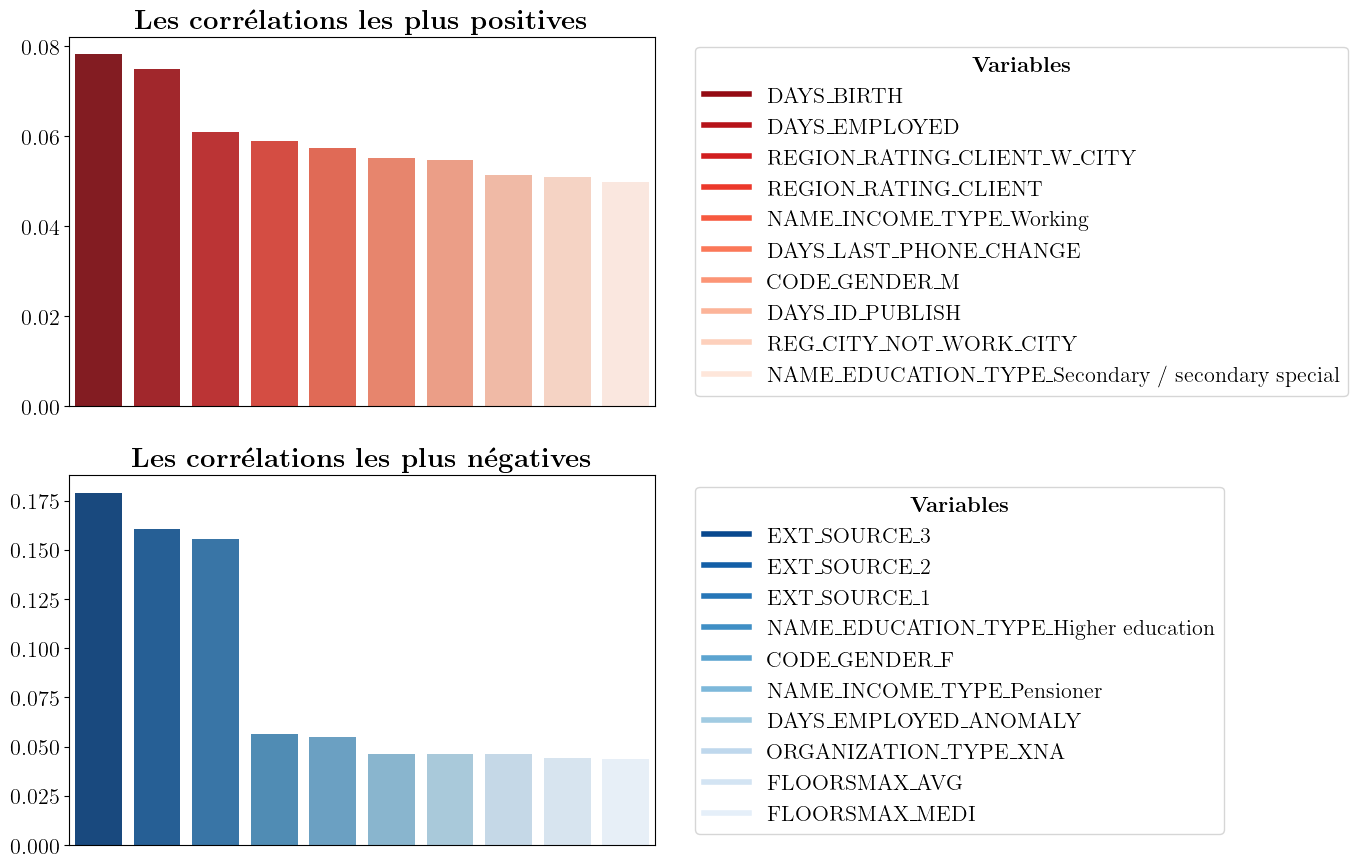

In [29]:
# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(2, 1, figsize=(14, 9))

palette_pos = sns.color_palette('Reds_r', 10)
palette_neg = sns.color_palette('Blues_r', 10)

# Barplot des 10 premières corrélations
sns.barplot(
    x=data_corr_pos.index,
    y=data_corr_pos.values,
    ax=axes[0],
    palette='Reds_r',
    hue = data_corr_pos.index
)

# Création de la légende manuellement
handles_pos = [plt.Line2D([0], [0], color=palette_pos[i], lw=4) for i in range(10)]
labels_pos = data_corr_pos.index
axes[0].legend(handles_pos, labels_pos, title=f"\\textbf{{Variables}}", bbox_to_anchor=(1.05, 0.5), loc='center left')

# Suppression des xticks
axes[0].set_xticks([])
axes[0].set_xticklabels([])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title(f"\\textbf{{Les corrélations les plus positives}}", size = 20)

# Rotation des étiquettes des ticks x
axes[0].tick_params(axis='x', labelsize=10)
for label in axes[0].get_xticklabels():
    label.set_rotation(90)

# Barplot des 10 dernières corrélations (les plus négatives)
sns.barplot(
    x=data_corr_neg.index,
    y=data_corr_neg.values,
    ax=axes[1],
    palette = 'Blues_r',
    hue = data_corr_neg.index
)

# Création de la légende manuellement
handles_neg = [plt.Line2D([0], [0], color=palette_neg[i], lw=4) for i in range(10)]
labels_neg = data_corr_neg.index
axes[1].legend(handles_neg, labels_neg, title=f"\\textbf{{Variables}}", bbox_to_anchor=(1.05, 0.5), loc='center left')

# Suppression des xticks
axes[1].set_xticks([])
axes[1].set_xticklabels([])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title(f"\\textbf{{Les corrélations les plus négatives}}", size = 20)

# Rotation des étiquettes des ticks x
axes[1].tick_params(axis='x', labelsize=10)
for label in axes[1].get_xticklabels():
    label.set_rotation(90)

plt.tight_layout()
plt.show()

In [30]:
#on va récupérer les variables numériques de type float parmi les variables les plus corrélées avec la cible

list_features_corr_pos = []
list_features_corr_neg = []

for feature in data_corr_pos.index:
    if data_train[feature].dtype == 'float64' or data_train[feature].dtype == 'int64':
        list_features_corr_pos.append(feature)

for feature in data_corr_neg.index:
    if data_train[feature].dtype == 'float64':
        list_features_corr_neg.append(feature)

print('-' * 60)
print(f"Il y a {len(list_features_corr_pos)} variables à étudier pour les corrélations positives")
print(f"Variables à étudier : {", ".join(map(str, list_features_corr_pos))}")
print('\n')
print(f"Il y a {len(list_features_corr_neg)} variables à étudier pour les corrélations négatives")
print(f"Variables à étudier : {", ".join(map(str, list_features_corr_neg))}")
print('-' * 60)

------------------------------------------------------------
Il y a 7 variables à étudier pour les corrélations positives
Variables à étudier : DAYS_BIRTH, DAYS_EMPLOYED, REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH, REG_CITY_NOT_WORK_CITY


Il y a 5 variables à étudier pour les corrélations négatives
Variables à étudier : EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1, FLOORSMAX_AVG, FLOORSMAX_MEDI
------------------------------------------------------------


In [31]:
#pour les variables numériques entières, on regarde le nombre de valeurs uniques.

for feature in list_features_corr_pos + list_features_corr_neg:
    print('-' * 40)
    print(f"Variable : {feature}")
    print(f"Nombre de valeurs uniques : {data_train[feature].unique().shape[0]}")

print('-' * 40)

----------------------------------------
Variable : DAYS_BIRTH
Nombre de valeurs uniques : 17460
----------------------------------------
Variable : DAYS_EMPLOYED
Nombre de valeurs uniques : 12574
----------------------------------------
Variable : REGION_RATING_CLIENT_W_CITY
Nombre de valeurs uniques : 3
----------------------------------------
Variable : REGION_RATING_CLIENT
Nombre de valeurs uniques : 3
----------------------------------------
Variable : DAYS_LAST_PHONE_CHANGE
Nombre de valeurs uniques : 3774
----------------------------------------
Variable : DAYS_ID_PUBLISH
Nombre de valeurs uniques : 6168
----------------------------------------
Variable : REG_CITY_NOT_WORK_CITY
Nombre de valeurs uniques : 2
----------------------------------------
Variable : EXT_SOURCE_3
Nombre de valeurs uniques : 815
----------------------------------------
Variable : EXT_SOURCE_2
Nombre de valeurs uniques : 119832
----------------------------------------
Variable : EXT_SOURCE_1
Nombre de vale

In [32]:
#on a déjà analysé la feature 'DAYS_EMPLOYED' et on supprime les variables ayant moins de 10 valeurs uniques.

list_features_corr_pos.remove('DAYS_EMPLOYED')
list_features_corr_pos.remove('REGION_RATING_CLIENT_W_CITY')
list_features_corr_pos.remove('REGION_RATING_CLIENT')
list_features_corr_pos.remove('REG_CITY_NOT_WORK_CITY')

In [33]:
#on affiche les listes

print('-' * 50)
print(f"Features pour les corrélations positives restantes :")
print(f"{", ".join(map(str, list_features_corr_pos))}")
print('\n')
print(f"Features pour les corrélations négatives restantes :")
print(f"{", ".join(map(str, list_features_corr_neg))}")
print('-' * 50)

--------------------------------------------------
Features pour les corrélations positives restantes :
DAYS_BIRTH, DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH


Features pour les corrélations négatives restantes :
EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1, FLOORSMAX_AVG, FLOORSMAX_MEDI
--------------------------------------------------


In [34]:
for feature in list_features_corr_pos + list_features_corr_neg:
    print('-' * 80)
    print(f"Valeurs manquantes pour la variable {feature} : {round(100 * data_train[feature].isnull().mean(), 3)}%")
print('-' * 80)

--------------------------------------------------------------------------------
Valeurs manquantes pour la variable DAYS_BIRTH : 0.0%
--------------------------------------------------------------------------------
Valeurs manquantes pour la variable DAYS_LAST_PHONE_CHANGE : 0.0%
--------------------------------------------------------------------------------
Valeurs manquantes pour la variable DAYS_ID_PUBLISH : 0.0%
--------------------------------------------------------------------------------
Valeurs manquantes pour la variable EXT_SOURCE_3 : 19.825%
--------------------------------------------------------------------------------
Valeurs manquantes pour la variable EXT_SOURCE_2 : 0.215%
--------------------------------------------------------------------------------
Valeurs manquantes pour la variable EXT_SOURCE_1 : 56.381%
--------------------------------------------------------------------------------
Valeurs manquantes pour la variable FLOORSMAX_AVG : 49.761%
------------------

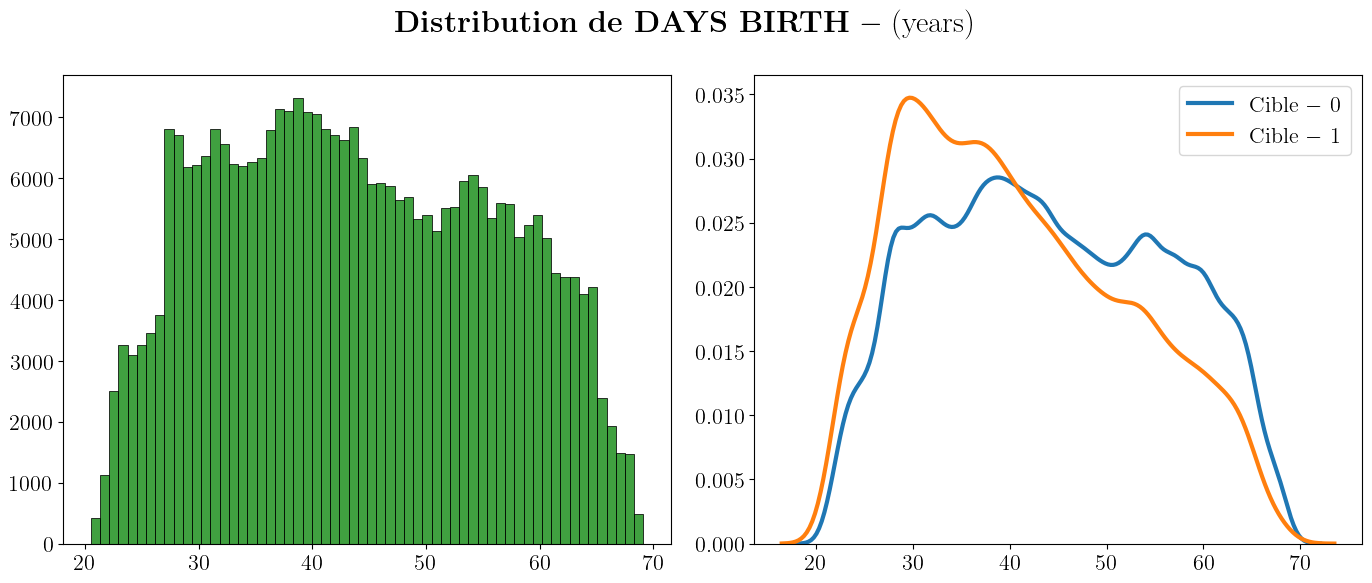

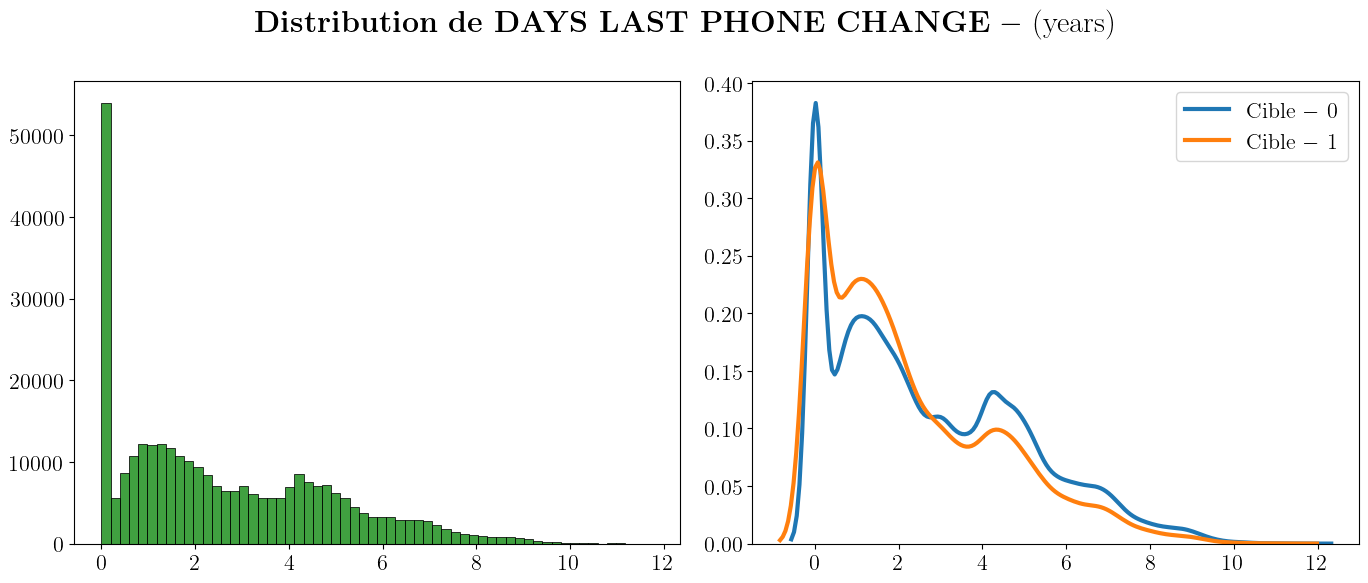

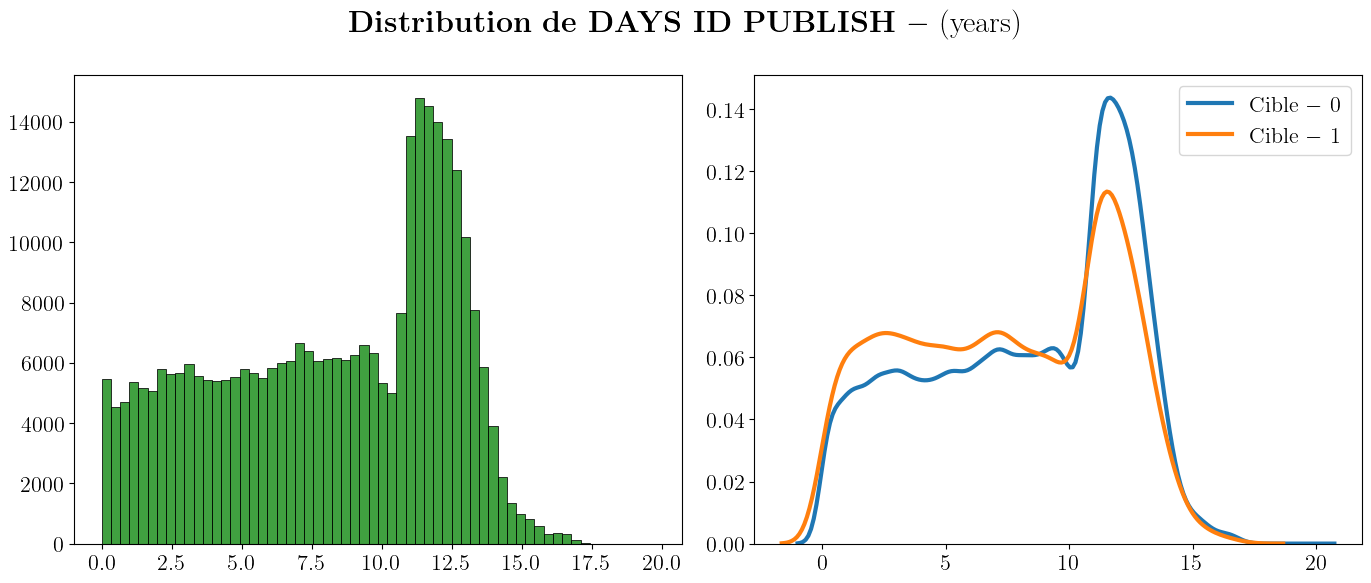

In [35]:
#on affiche pour les features corrélées positivement

for feature in list_features_corr_pos:
    #pour le titre
    name = feature.replace('_', ' ')

    #les données à plot
    x_hist = -data_train[feature] / 365
    x_kde_0 = -data_train.loc[data_train['TARGET'] == 0, feature] / 365
    x_kde_1 = -data_train.loc[data_train['TARGET'] == 1, feature] / 365

    #les graphiques
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios':[1,1]})

    #histogramme
    sns.histplot(x_hist, color = 'green', bins = 60, ax = axes[0])

    #courbes de densité
    sns.kdeplot(x_kde_0, label = 'Cible $-$ 0', ax = axes[1], linewidth = 3, legend = True)
    sns.kdeplot(x_kde_1, label = 'Cible $-$ 1', ax = axes[1], linewidth = 3, legend = True)

    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    fig.suptitle(f"\\textbf{{Distribution de {name}}} $-$ (years)", size = 22)

    plt.legend()
    plt.tight_layout()
    plt.show()

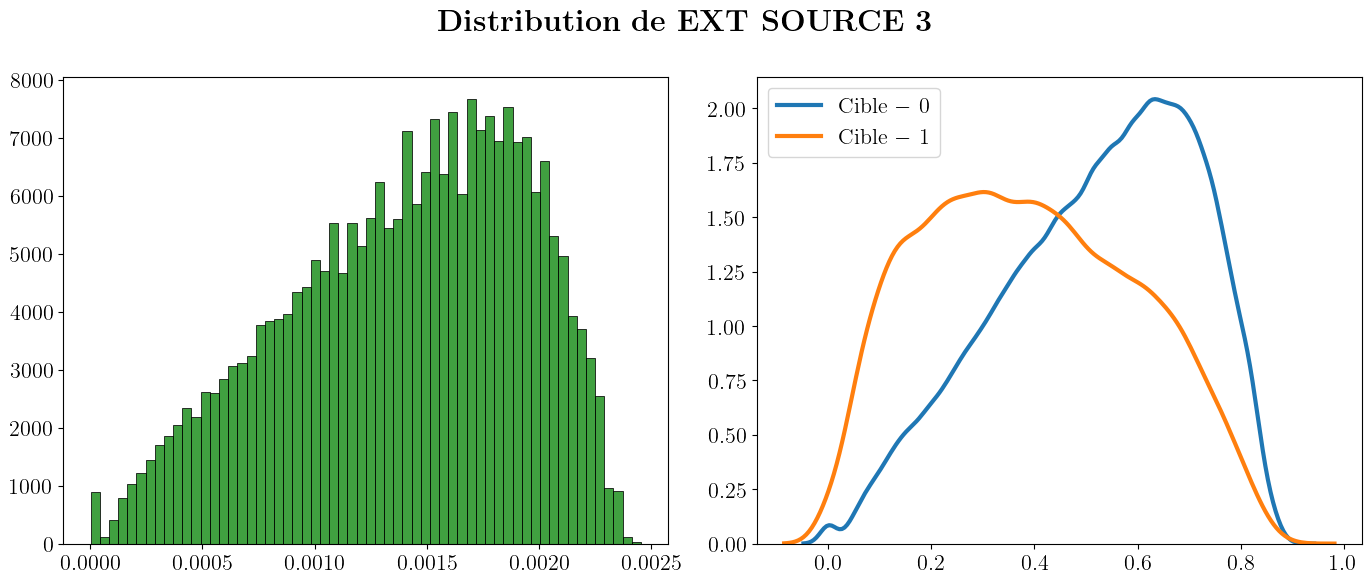

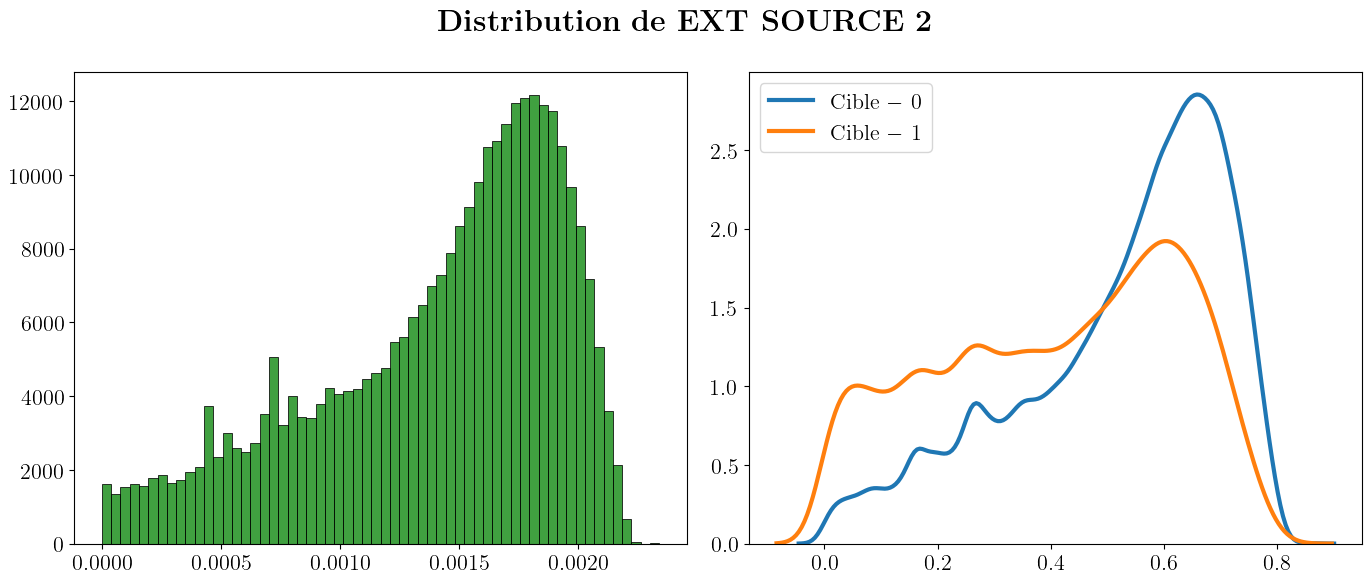

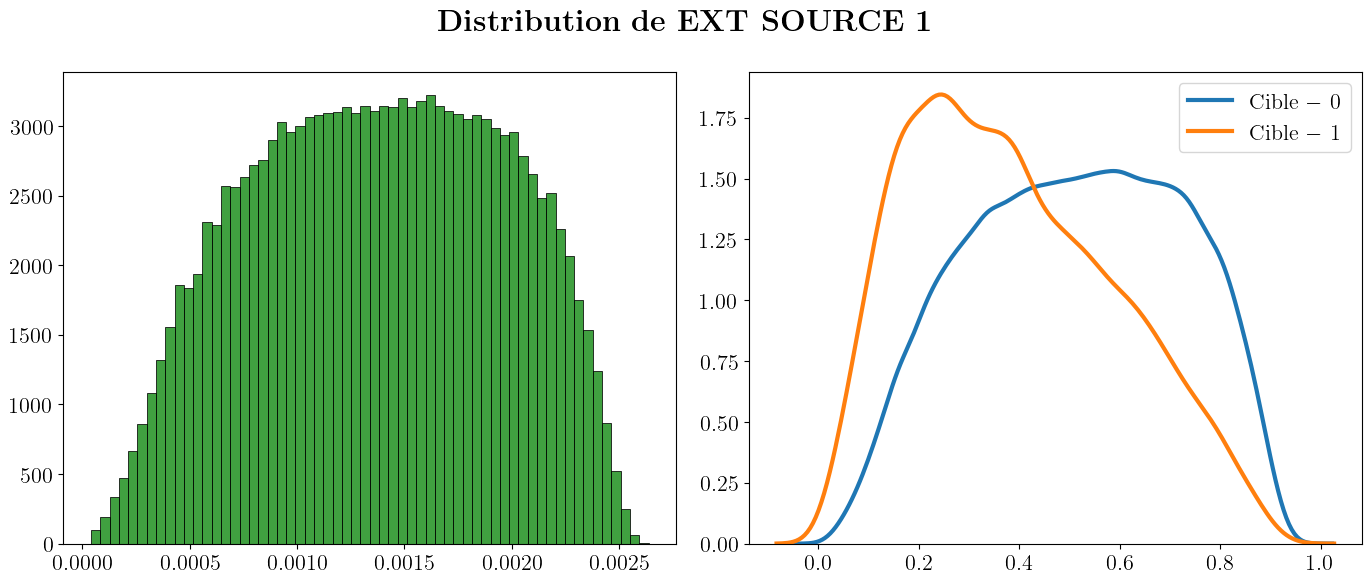

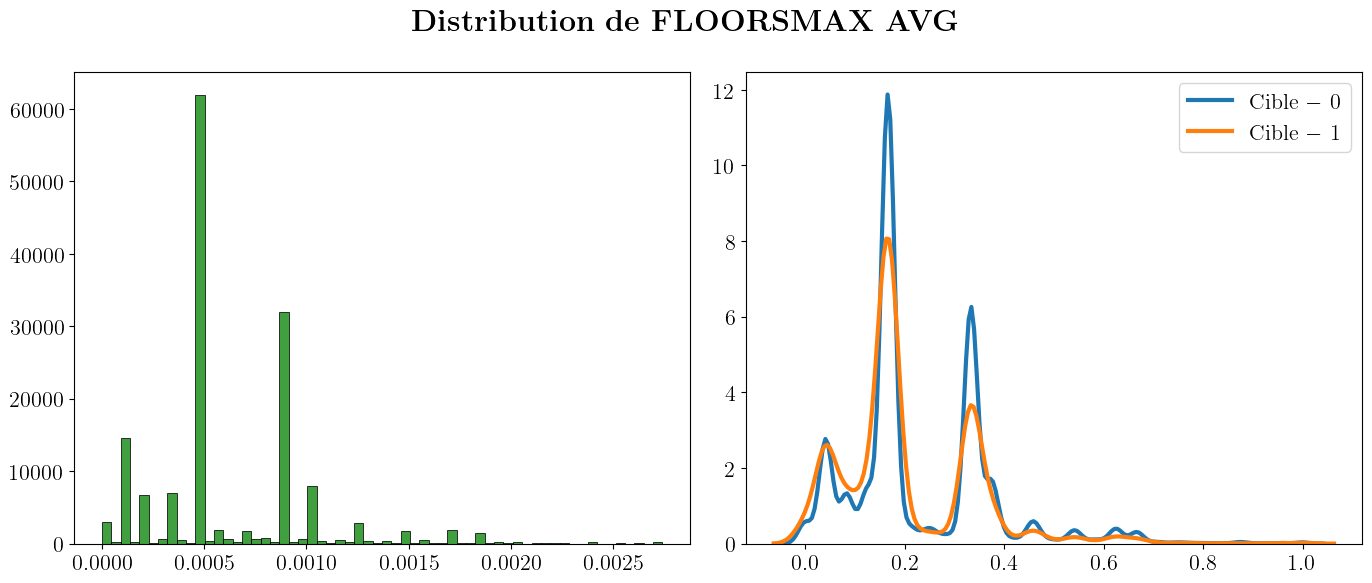

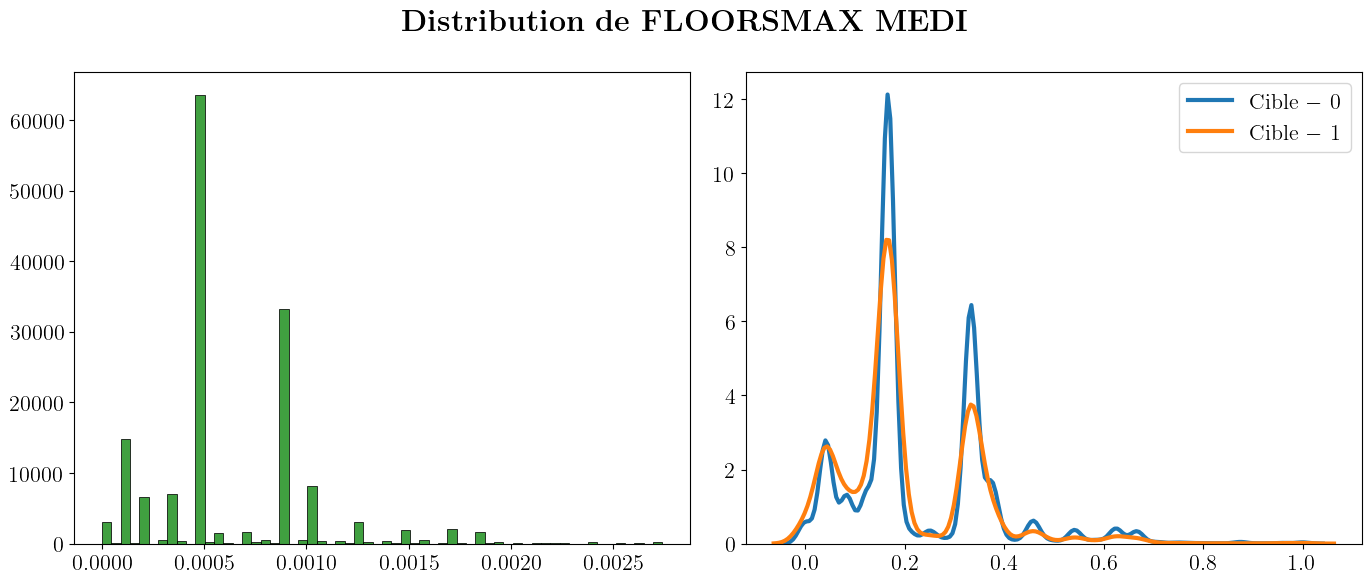

In [36]:
#on affiche pour les features corrélées négativement

for feature in list_features_corr_neg:
    #pour le titre
    name = feature.replace('_', ' ')

    #les données à plot
    x_hist = data_train[feature] / 365
    x_kde_0 = data_train.loc[data_train['TARGET'] == 0, feature]
    x_kde_1 = data_train.loc[data_train['TARGET'] == 1, feature]

    #les graphiques
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios':[1,1]})

    #histogramme
    sns.histplot(x_hist, color = 'green', bins = 60, ax = axes[0])

    #courbes de densité
    sns.kdeplot(x_kde_0, label = 'Cible $-$ 0', ax = axes[1], linewidth = 3)
    sns.kdeplot(x_kde_1, label = 'Cible $-$ 1', ax = axes[1], linewidth = 3)

    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    fig.suptitle(f"\\textbf{{Distribution de {name}}}", size = 22)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [37]:
#on s'intéresse aux features qui ont une distribution différente en fonction de la TARGET à savoir 'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2' et 'EXT_SOURCE_3'

data_train['DAYS_BIRTH'] = data_train['DAYS_BIRTH'].apply(np.abs)
data_test['DAYS_BIRTH'] = data_test['DAYS_BIRTH'].apply(np.abs)

data_age = data_train[['TARGET', 'DAYS_BIRTH']].copy()
data_source_1 = data_train[['TARGET', 'EXT_SOURCE_1']].copy()
data_source_2 = data_train[['TARGET', 'EXT_SOURCE_2']].copy()
data_source_3 = data_train[['TARGET', 'EXT_SOURCE_3']].copy()

display(data_age.head(3))
display(data_source_1.head(3))
display(data_source_2.head(3))
display(data_source_3.head(3))

,TARGET,DAYS_BIRTH
0,1,9461
1,0,16765
2,0,19046


,TARGET,EXT_SOURCE_1
0,1,0.083037
1,0,0.311267
2,0,NaN


,TARGET,EXT_SOURCE_2
0,1,0.262949
1,0,0.622246
2,0,0.555912


,TARGET,EXT_SOURCE_3
0,1,0.139376
1,0,NaN
2,0,0.729567


In [38]:
#on y va

data_age['YEARS_BIRTH'] = round(data_age['DAYS_BIRTH'] / 365, 2)

In [39]:
data_age.describe()

,TARGET,DAYS_BIRTH,YEARS_BIRTH
count,307511.000000,307511.000000,307511.000000
mean,0.080729,16036.995067,43.936976
std,0.272419,4363.988632,11.956135
min,0.000000,7489.000000,20.520000
25%,0.000000,12413.000000,34.010000
50%,0.000000,15750.000000,43.150000
75%,0.000000,19682.000000,53.920000
max,1.000000,25229.000000,69.120000


In [40]:
#on cut
data_age['AGE_GROUP'] = pd.cut(data_age['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

data_age.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH,AGE_GROUP
0,1,9461,25.92,"(25.0, 30.0]"
1,0,16765,45.93,"(45.0, 50.0]"
2,0,19046,52.18,"(50.0, 55.0]"
3,0,19005,52.07,"(50.0, 55.0]"
4,0,19932,54.61,"(50.0, 55.0]"


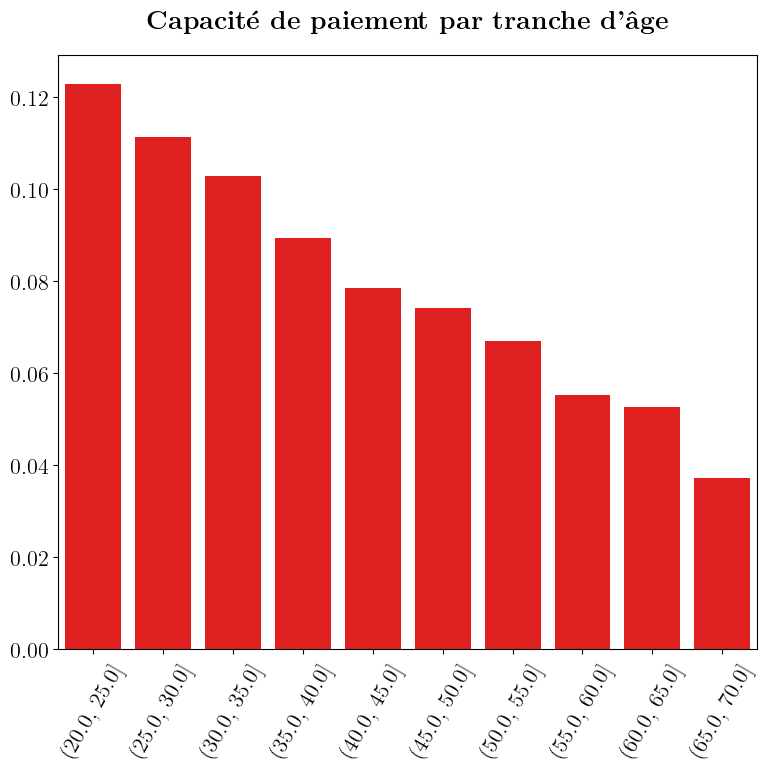

In [41]:
#on regroupe par tranche d'age et on affiche

age_groups = data_age.groupby('AGE_GROUP', observed = False).mean()

plt.figure(figsize = (8, 8))

sns.barplot(x = age_groups.index.astype(str), y = age_groups['TARGET'], color = 'red')

plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 60)
plt.title(f"\\textbf{{Capacité de paiement par tranche d'âge}}", pad = 20)

plt.tight_layout()
plt.show()

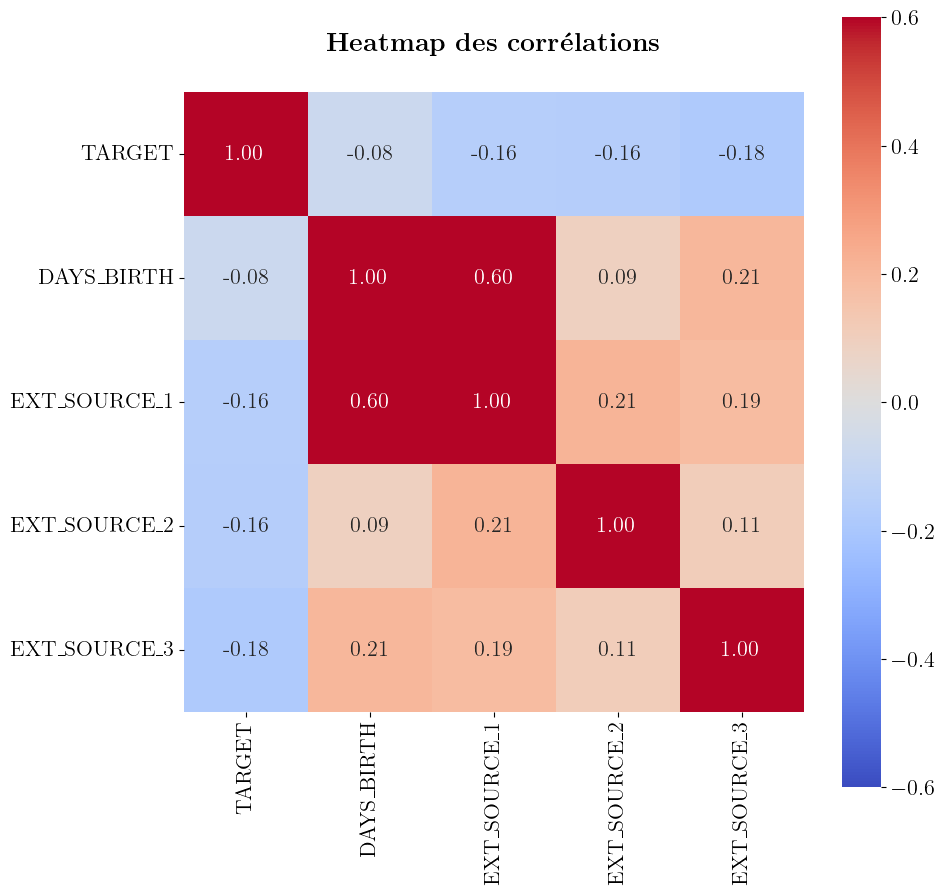

In [42]:
#on instancie nos features utiles
data_train_impfeat = data_train[['TARGET', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].copy()


#on calcule les corrélations
data_train_impfeat_corr = data_train_impfeat.corr()

plt.figure(figsize=(10,10))

sns.heatmap(data_train_impfeat_corr, annot = True, fmt = ".2f", cmap='coolwarm', vmin = -0.6, vmax = 0.6, square = True)
plt.title(f"\\textbf{{Heatmap des corrélations}}", pad = 30)
plt.show()

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

In [108]:
#on instancie notre imputer

imputer = SimpleImputer(strategy='mean')

data_train_poly = data_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
data_test_poly = data_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

data_train_poly = imputer.fit_transform(data_train_poly)
data_test_poly = imputer.fit_transform(data_test_poly)

In [109]:
#on cree un transformeur polynomial

polynomial_transformer = PolynomialFeatures(degree = 3)

#on l'entraine
polynomial_transformer.fit(data_train_poly)

#on l'applique
data_train_poly = polynomial_transformer.transform(data_train_poly)
data_test_poly = polynomial_transformer.transform(data_test_poly)

#on remet en dataframe
data_train_poly = pd.DataFrame(data_train_poly, columns = polynomial_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))
data_test_poly = pd.DataFrame(data_test_poly, columns = polynomial_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

#pour merge avec les df originaux, on ajoute SK_ID_CURR
data_train_poly['SK_ID_CURR'] = data_train['SK_ID_CURR']
data_test_poly['SK_ID_CURR'] = data_test['SK_ID_CURR']

In [110]:
#on merge
df_train_poly = data_train.merge(data_train_poly, on = 'SK_ID_CURR', how = 'left')
df_test_poly = data_test.merge(data_test_poly, on = 'SK_ID_CURR', how = 'left')

#on aligne
df_train_poly, df_test_poly = df_train_poly.align(df_test_poly, join = 'inner', axis = 1)

print('-' * 50)
print(f"Nouvelles dimensions pour les données d'entrainement : {df_train_poly.shape}")
print(f"Nouvelles dimensions pour les données de test : {df_test_poly.shape}")
print('-' * 50)

--------------------------------------------------
Nouvelles dimensions pour les données d'entrainement : (307511, 275)
Nouvelles dimensions pour les données de test : (48744, 275)
--------------------------------------------------


In [111]:
#on sauvegarde nos features polynomiales

original_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']
polynomial_features = polynomial_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']).tolist()

polynomial_features_filtered = [feature for feature in polynomial_features if feature not in original_features]

In [112]:
data_train_poly['DAYS_BIRTH']

0          9461.0
1         16765.0
2         19046.0
3         19005.0
4         19932.0
           ...   
307506     9327.0
307507    20775.0
307508    14966.0
307509    11961.0
307510    16856.0
Name: DAYS_BIRTH, Length: 307511, dtype: float64

In [113]:
#on modifie quelques features existantes

app_train = df_train_poly.copy()
app_test = df_test_poly.copy()

liste_variables_negatives = df_train_poly.describe().iloc[1,:][df_train_poly.describe().iloc[1,:] < 0].index.tolist()

for variable in liste_variables_negatives:
    app_train[variable] = app_train[variable].apply(np.abs)
    app_test[variable] = app_test[variable].apply(np.abs)

In [114]:
app_train_copy = app_train.copy()
app_test_copy = app_test.copy()

In [115]:
#certaines colonnes ont été dédoublées

app_train.drop(columns = ['DAYS_BIRTH_x', 'EXT_SOURCE_1_x', 'EXT_SOURCE_2_x', 'EXT_SOURCE_3_x'], inplace = True)
app_test.drop(columns = ['DAYS_BIRTH_x', 'EXT_SOURCE_1_x', 'EXT_SOURCE_2_x', 'EXT_SOURCE_3_x'], inplace = True)

app_train.rename(columns = {'DAYS_BIRTH_y': 'DAYS_BIRTH',
                           'EXT_SOURCE_1_y': 'EXT_SOURCE_1',
                           'EXT_SOURCE_2_y': 'EXT_SOURCE_2',
                           'EXT_SOURCE_3_y': 'EXT_SOURCE_3'}, inplace = True)
app_test.rename(columns = {'DAYS_BIRTH_y': 'DAYS_BIRTH',
                           'EXT_SOURCE_1_y': 'EXT_SOURCE_1',
                           'EXT_SOURCE_2_y': 'EXT_SOURCE_2',
                           'EXT_SOURCE_3_y': 'EXT_SOURCE_3'}, inplace = True)

In [116]:
#on créé de nouvelles features

#pour train
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
app_train['INCOME_CREDIT_PERCENT'] = app_train['AMT_INCOME_TOTAL'] / app_train['AMT_CREDIT']
app_train['INCOME_PER_PERSON'] = app_train['AMT_INCOME_TOTAL'] / app_train['CNT_FAM_MEMBERS']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['PAYMENT_RATE'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']

#pour test
app_test['DAYS_EMPLOYED_PERCENT'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']
app_test['INCOME_CREDIT_PERCENT'] = app_test['AMT_INCOME_TOTAL'] / app_test['AMT_CREDIT']
app_test['INCOME_PER_PERSON'] = app_test['AMT_INCOME_TOTAL'] / app_test['CNT_FAM_MEMBERS']
app_test['ANNUITY_INCOME_PERCENT'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']
app_test['PAYMENT_RATE'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']

In [117]:
#on vérifie l'alignement des datas

app_train.columns.tolist() == app_test.columns.tolist()

True

In [118]:
#on impute

list_colonnes = app_train.columns.tolist()

#on fit notre imputer
imputer.fit(app_train)

#on l'applique
train_array = imputer.transform(app_train)
test_array = imputer.transform(app_test)

In [119]:
#on remet en dataframes

df_train = pd.DataFrame(train_array, columns = list_colonnes)
df_test = pd.DataFrame(test_array, columns = list_colonnes)


#on remet la target dans le jeu d'entrainement

df_train['TARGET'] = data_train['TARGET']

In [120]:
#on vérifie qu'il n'y ait pas de doublons

print('-' * 50)
print(f"Jeu d'entraînement : {100 * (len(df_train['SK_ID_CURR'].unique()) / df_train.shape[0])}% de valeurs uniques")
print(f"Jeu de test : {100 * (len(df_test['SK_ID_CURR'].unique()) / df_test.shape[0])}% de valeurs uniques")
print('-' * 50)

--------------------------------------------------
Jeu d'entraînement : 100.0% de valeurs uniques
Jeu de test : 100.0% de valeurs uniques
--------------------------------------------------


In [121]:
#on créé les dataframes sans polynomial features également

df_train_poly = df_train.copy()
df_test_poly = df_test.copy()

df_train = df_train.drop(columns = polynomial_features_filtered)
df_test = df_test.drop(columns = polynomial_features_filtered)

In [127]:
#on enregistre

df_train.to_csv('./dataframes/df_train.csv', index = False)
df_test.to_csv('./dataframes/df_test.csv', index = False)

df_train_poly.to_csv('./dataframes/df_train_poly.csv', index = False)
df_test_poly.to_csv('./dataframes/df_test_poly.csv', index = False)

## 2 - MODELISATION
***

In [3]:
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer, recall_score, f1_score

import importlib
import fonctions as fc

In [4]:
#on importe

df_train = pd.read_csv('./dataframes/df_train.csv')
df_test = pd.read_csv('./dataframes/df_test.csv')

df_train_poly = pd.read_csv('./dataframes/df_train_poly.csv')
df_test_poly = pd.read_csv('./dataframes/df_test_poly.csv')

### 2.1 - PREPROCESSING
***

In [5]:
#on va selectionner un échantillon de nos données pour les modèles de ML

sample_size = 0.5

df_train_sampled, df_test_trash = train_test_split(df_train, test_size = 1 - sample_size, stratify=df_train['TARGET'], random_state = 42)
df_train_poly_sampled, df_test_poly_trash = train_test_split(df_train_poly, test_size = 1 - sample_size, stratify=df_train_poly['TARGET'], random_state = 42)

#on vérifie que les ratios de la target soient identiques
original_ratio = round(df_train['TARGET'].value_counts() / df_train.shape[0], 3).tolist()
new_ratio = round(df_train_sampled['TARGET'].value_counts() / df_train_sampled.shape[0], 3).tolist()

print('-' * 20)
print('Ratio original')
print('-' * 20)
print('TARGET 0 :', original_ratio[0])
print('TARGET 1 :', original_ratio[1])
print('\n')
print('-' * 20)
print('Ratio nouveau')
print('-' * 20)
print('TARGET 0 :', new_ratio[0])
print('TARGET 1 :', new_ratio[1])
print('-' * 20)

--------------------
Ratio original
--------------------
TARGET 0 : 0.919
TARGET 1 : 0.081


--------------------
Ratio nouveau
--------------------
TARGET 0 : 0.919
TARGET 1 : 0.081
--------------------


In [131]:
#on enregistre l'échantillon d'entrainement

df_train_sampled.to_csv('./dataframes/data_train_sampled.csv', index = False)
df_train_poly_sampled.to_csv('./dataframes/data_train_poly_sampled.csv', index = False)

In [4]:
df_train_sampled = pd.read_csv('./dataframes/data_train_sampled.csv')
df_train_poly_sampled = pd.read_csv('./dataframes/data_train_poly_sampled.csv')

In [6]:
df_train_poly_sampled.shape

(153755, 277)

In [8]:
#vérification pour être sur

df_train_sampled['SK_ID_CURR'].tolist() == df_train_poly_sampled['SK_ID_CURR'].tolist()

True

In [7]:
#on sépare les données de la cible

X = df_train_sampled.drop(columns = ['TARGET']).values
X_poly = df_train_poly_sampled.drop(columns = ['TARGET']).values
                                    
y = df_train_sampled['TARGET'].values

In [8]:
#on split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
#on vérifie

y_poly_train.tolist() == y_train.tolist()

True

In [10]:
#on retire l'ID

train_id = X_train[:,0]
test_id = X_test[:,0]

X_train = X_train[:, 1:]
X_test = X_test[:, 1:]
X_poly_train = X_poly_train[:, 1:]
X_poly_test = X_poly_test[:, 1:]

In [11]:
#on instancie nos scalers

std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

std_scaler.fit(X_train)
mm_scaler.fit(X_train)

X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

X_train_mms = mm_scaler.transform(X_train)
X_test_mms = mm_scaler.transform(X_test)

In [12]:
#de meme avec les données poly

std_scaler.fit(X_poly_train)
mm_scaler.fit(X_poly_train)

X_poly_train_std = std_scaler.transform(X_poly_train)
X_poly_test_std = std_scaler.transform(X_poly_test)

X_poly_train_mms = mm_scaler.transform(X_poly_train)
X_poly_test_mms = mm_scaler.transform(X_poly_test)

### 2.2 - MODELE LINEAIRE
***

In [20]:
#grille de recherche
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.0001],
    'solver': ['liblinear'],
    'max_iter': [500, 1000, 1500]
}


#modele
logreg = LogisticRegression()

#### 2.2.1 - SANS POLYNOMIAL FEATURES
***

In [21]:
#on run la fonction
data_logreg_o, data_logreg_scores_o = fc.mlflow_run_model(
    "Logistic Regression", 
    logreg, 
    param_grid_logistic, 
    'roc_auc', 
    5, 
    X_train, 
    X_test, 
    y_train, 
    y_test, 
    "lr-original", 
    "logistic-reg-original"
)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Successfully registered model 'sklearn-logistic-reg-original'.
Created version '1' of model 'sklearn-logistic-reg-original'.


In [22]:
#on run avec données standardisées
data_logreg_std_o, data_logreg_std_scores_o = fc.mlflow_run_model(
    "Logistic Regression", 
    logreg, 
    param_grid_logistic, 
    'roc_auc', 
    5, 
    X_train_std, 
    X_test_std, 
    y_train, 
    y_test, 
    "lr-original-std", 
    "logistic-reg-original-std"
)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Successfully registered model 'sklearn-logistic-reg-original-std'.
Created version '1' of model 'sklearn-logistic-reg-original-std'.


In [23]:
#on run avec donnees minmaxscaled
data_logreg_mms_o, data_logreg_mms_scores_o = fc.mlflow_run_model(
    "Logistic Regression", 
    logreg, 
    param_grid_logistic, 
    'roc_auc', 
    5, 
    X_train_mms, 
    X_test_mms, 
    y_train, 
    y_test, 
    "lr-original-mms", 
    "logistic-reg-original-mms"
)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Successfully registered model 'sklearn-logistic-reg-original-mms'.
Created version '1' of model 'sklearn-logistic-reg-original-mms'.


#### 2.2.2 - AVEC POLYNOMIAL FEATURES
***

In [25]:
#on run la fonction

data_logreg_p, data_logreg_scores_p = fc.mlflow_run_model(
    "Logistic Regression", 
    logreg, 
    param_grid_logistic, 
    'roc_auc', 
    5, 
    X_poly_train, 
    X_poly_test, 
    y_poly_train, 
    y_poly_test, 
    "lr-poly", 
    "logistic-reg-poly"
)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Successfully registered model 'sklearn-logistic-reg-poly'.
Created version '1' of model 'sklearn-logistic-reg-poly'.


In [26]:
#on run la fonction

data_logreg_std_p, data_logreg_std_scores_p = fc.mlflow_run_model(
    "Logistic Regression", 
    logreg, 
    param_grid_logistic, 
    'roc_auc', 
    5, 
    X_poly_train_std, 
    X_poly_test_std, 
    y_poly_train, 
    y_poly_test, 
    "lr-poly-std", 
    "logistic-reg-poly-std"
)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Successfully registered model 'sklearn-logistic-reg-poly-std'.
Created version '1' of model 'sklearn-logistic-reg-poly-std'.


In [27]:
#on run la fonction

data_logreg_mms_p, data_logreg_mms_scores_p = fc.mlflow_run_model(
    "Logistic Regression", 
    logreg, 
    param_grid_logistic, 
    'roc_auc', 
    5, 
    X_poly_train_mms, 
    X_poly_test_mms, 
    y_poly_train, 
    y_poly_test, 
    "lr-poly-mms", 
    "logistic-reg-poly-mms"
)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Successfully registered model 'sklearn-logistic-reg-poly-mms'.
Created version '1' of model 'sklearn-logistic-reg-poly-mms'.


### 2.3 - FORETS ALEATOIRES
***

In [16]:
#grille de recherche
param_grid_rfc = {
    "n_estimators": [500, 1000, 1500],
    "max_depth": [10, 20, 30],
    "min_samples_leaf": [4, 5]
}

#le modele
rfc = RandomForestClassifier()

#### 2.3.1 - SANS POLYNOMIAL FEATURES
***

In [ ]:
#on run la fonction
data_rfc_o, data_rfc_scores_o = fc.mlflow_run_model(
    "Random Forest Classifier", 
    rfc, 
    param_grid_rfc,
    'roc_auc',
    5, 
    X_train, 
    X_test, 
    y_train, 
    y_test, 
    "rfc-original", 
    "random-forest-original"
)

In [31]:
#on run avec données standardisées
data_rfc_std_o, data_rfc_std_scores_o = fc.mlflow_run_model(
    "Random Forest Classifier", 
    rfc, 
    param_grid_rfc,
    'roc_auc',
    5, 
    X_train_std, 
    X_test_std,
    y_train,
    y_test,
    "rfc-original-std", 
    "random-forest-original-std"
)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/adrien/devcode/python/environnements/env_ml/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Successfully registered model 'sklearn-random-forest-original-std'.
Created version '1' of model 'sklearn-random-forest-original-std'.


In [32]:
#on avec données minmaxscaled
data_rfc_mms_o, data_rfc_mms_scores_o = fc.mlflow_run_model(
    "Random Forest Classifier", 
    rfc, 
    param_grid_rfc,
    'roc_auc',
    5, 
    X_train_mms,
    X_test_mms, 
    y_train, 
    y_test, 
    "rfc-original-mms", 
    "random-forest-original-mms"
)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/adrien/devcode/python/environnements/env_ml/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Successfully registered model 'sklearn-random-forest-original-mms'.
Created version '1' of model 'sklearn-random-forest-original-mms'.


#### 2.3.2 - AVEC POLYNOMIAL FEATURES
***

In [33]:
#on run la fonction

data_rfc_p, data_rfc_scores_p = fc.mlflow_run_model(
    "Random Forest Classifier", 
    rfc, 
    param_grid_rfc,
    'roc_auc',
    5, 
    X_poly_train, 
    X_poly_test, 
    y_poly_train, 
    y_poly_test, 
    "rfc-poly", 
    "random-forest-poly"
)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/adrien/devcode/python/environnements/env_ml/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Successfully registered model 'sklearn-random-forest-poly'.
Created version '1' of model 'sklearn-random-forest-poly'.


In [34]:
#on run la fonction

data_rfc_std_p, data_rfc_std_scores_p = fc.mlflow_run_model(
    "Random Forest Classifier", 
    rfc, 
    param_grid_rfc,
    'roc_auc',
    5, 
    X_poly_train_std, 
    X_poly_test_std, 
    y_poly_train, 
    y_poly_test, 
    "rfc-poly-std", 
    "random-forest-poly-std"
)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/adrien/devcode/python/environnements/env_ml/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Successfully registered model 'sklearn-random-forest-poly-std'.
Created version '1' of model 'sklearn-random-forest-poly-std'.


In [18]:
#on run la fonction

data_rfc_mms_p, data_rfc_mms_scores_p = fc.mlflow_run_model(
    "Random Forest Classifier", 
    rfc,
    param_grid_rfc,
    'roc_auc',
    5,
    X_poly_train_mms,
    X_poly_test_mms, 
    y_poly_train, 
    y_poly_test, 
    "rfc-poly-mms", 
    "random-forest-poly-mms"
)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/adrien/devcode/python/environnements/env_ml/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/adrien/devcode/python/environnements/env_ml/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
Successfully registered model 'sklearn-random-forest-poly-mms'.
Created version '1' of model 'sklearn-random-forest-poly-mms'.


### 2.4 - XGBOOST
***

In [20]:
#grille de recherche
param_grid_xgb = {
    "booster": ['gbtree', 'gblinear'],
    "n_estimators": [100, 500, 1000, 2000],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "objective":  ['binary:logistic']
}

#le modele
xgb = XGBClassifier()

#### 2.4.1 - SANS POLYNOMIAL FEATURES
***

In [21]:
#on run la fonction

data_xgb_o, data_xgb_o_scores = fc.mlflow_run_model(
    "XGBOOST Classifier", 
    xgb, 
    param_grid_xgb,
    'roc_auc',
    5, 
    X_train, 
    X_test, 
    y_train, 
    y_test, 
    "xgb-original", 
    "xgboost-original"
)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


Successfully registered model 'sklearn-xgboost-original'.
Created version '1' of model 'sklearn-xgboost-original'.


In [22]:
#on run avec données standardisées

data_xgb_std_o, data_xgb_std_o_scores = fc.mlflow_run_model(
    "XGBOOST Classifier", 
    xgb, 
    param_grid_xgb,
    'roc_auc',
    5, 
    X_train_std, 
    X_test_std, 
    y_train, 
    y_test, 
    "xgb-original-std", 
    "xgboost-original-std"
)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


Successfully registered model 'sklearn-xgboost-original-std'.
Created version '1' of model 'sklearn-xgboost-original-std'.


In [24]:
#on run avec données minmaxscaled

data_xgb_mms_o, data_xgb_mms_o_scores = fc.mlflow_run_model(
    "XGBOOST Classifier", 
    xgb, 
    param_grid_xgb,
    'roc_auc',
    5, 
    X_train_mms, 
    X_test_mms, 
    y_train, 
    y_test, 
    "xgb-original-mms", 
    "xgboost-original-mms"
)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


Successfully registered model 'sklearn-xgboost-original-mms'.
Created version '1' of model 'sklearn-xgboost-original-mms'.


#### 2.4.2 - AVEC POLYNOMIAL FEATURES
***

In [25]:
#on run la fonction

data_xgb_p, data_xgb_p_scores = fc.mlflow_run_model(
    "XGBOOST Classifier", 
    xgb, 
    param_grid_xgb,
    'roc_auc',
    5, 
    X_poly_train, 
    X_poly_test, 
    y_poly_train, 
    y_poly_test, 
    "xgb-poly", 
    "xgboost-poly"
)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


Successfully registered model 'sklearn-xgboost-poly'.
Created version '1' of model 'sklearn-xgboost-poly'.


In [27]:
#on run la fonction

data_xgb_std_p, data_xgb_std_p_scores = fc.mlflow_run_model(
    "XGBOOST Classifier", 
    xgb, 
    param_grid_xgb,
    'roc_auc',
    5, 
    X_poly_train_std, 
    X_poly_test_std, 
    y_poly_train, 
    y_poly_test, 
    "xgb-poly-std", 
    "xgboost-poly-std"
)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


Successfully registered model 'sklearn-xgboost-poly-std'.
Created version '1' of model 'sklearn-xgboost-poly-std'.


In [28]:
#on run la fonction

data_xgb_mms_p, data_xgb_mms_p_scores = fc.mlflow_run_model(
    "XGBOOST Classifier", 
    xgb, 
    param_grid_xgb,
    'roc_auc',
    5, 
    X_poly_train_mms, 
    X_poly_test_mms, 
    y_poly_train, 
    y_poly_test, 
    "xgb-poly-mms", 
    "xgboost-poly-mms"
)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


Successfully registered model 'sklearn-xgboost-poly-mms'.
Created version '1' of model 'sklearn-xgboost-poly-mms'.


In [ ]:
#on sauvegarde pour reimporter plus tard

pd.DataFrame(X_train).to_csv('./dataframes/xtrain.csv', index = False)
pd.DataFrame(X_test).to_csv('./dataframes/xtest.csv', index = False)

pd.DataFrame(X_train_std).to_csv('./dataframes/xtrainstd.csv', index = False)
pd.DataFrame(X_test_std).to_csv('./dataframes/xteststd.csv', index = False)

pd.DataFrame(X_train_mms).to_csv('./dataframes/xtrainmms.csv', index = False)
pd.DataFrame(X_test_mms).to_csv('./dataframes/xtestmms.csv', index = False)


pd.DataFrame(X_poly_train).to_csv('./dataframes/xpolytrain.csv', index = False)
pd.DataFrame(X_poly_test).to_csv('./dataframes/xpolytest.csv', index = False)

pd.DataFrame(X_poly_train_std).to_csv('./dataframes/xpolytrainstd.csv', index = False)
pd.DataFrame(X_poly_test_std).to_csv('./dataframes/xpolyteststd.csv', index = False)

pd.DataFrame(X_poly_train_mms).to_csv('./dataframes/xpolytrainmms.csv', index = False)
pd.DataFrame(X_poly_test_mms).to_csv('./dataframes/xpolytestmms.csv', index = False)

pd.DataFrame(y_train).to_csv('./dataframes/ytrain.csv', index = False)
pd.DataFrame(y_test).to_csv('./dataframes/ytest.csv', index = False)

In [15]:
X_train_std = pd.read_csv('./dataframes/xtrainstd.csv').values
X_test_std = pd.read_csv('./dataframes/xteststd.csv').values
y_train = pd.read_csv('./dataframes/ytrain.csv').values
y_test = pd.read_csv('./dataframes/ytest.csv').values

In [107]:
liste_colonnes = pd.read_csv('./dataframes/df_train.csv').columns.tolist()
liste_colonnes = liste_colonnes[1:-1]

In [22]:
y_train = y_train.flatten().tolist()
y_test = y_test.flatten().tolist()

In [25]:
X_train_std.shape

(123004, 244)

## 3 - OPTIMISATION DU MODELE
***

In [97]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [27]:
#on garde le meilleur modèle

model = XGBClassifier(
    objective = 'binary:logistic',
    n_estimators = 1000,
    booster = 'gbtree',
    learning_rate = 0.01
)

#on le fit
model.fit(X_train_std, y_train)

#on prédit
y_pred_proba = model.predict_proba(X_test_std)[:,1]

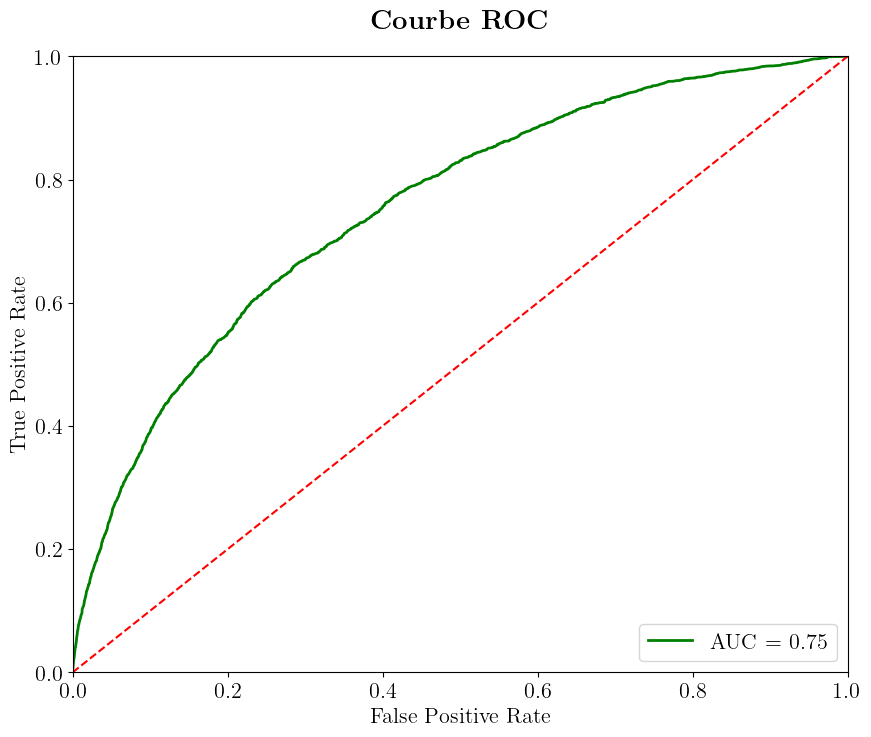

In [104]:
#On affiche la courbe ROC

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

plt.figure(figsize=(10, 8))
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.title(f"\\textbf{{Courbe ROC}}", pad = 20, size = 20)
sns.lineplot(x = fpr, y = tpr, color = 'green', linewidth = 2, label = f'AUC = {roc_auc:.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [91]:
plt.rc('text', usetex = False)

--------------------------------------------------------------------------------
Seuil optimal : 0.07
---------------------
Accuracy Score : 0.65
Score Métier : 0.86
--------------------------------------------------------------------------------


Voulez-vous afficher le graphique des scores en fonction des seuils ? (y/n) :  y


--------------------------------------------------------------------------------


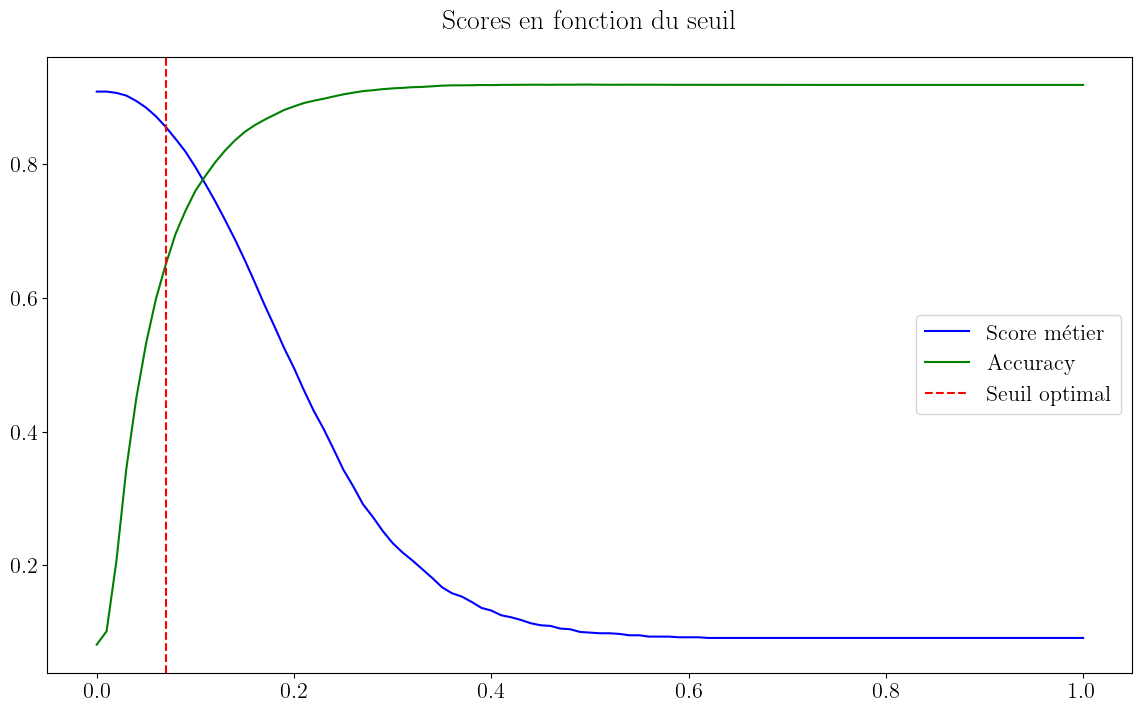

In [105]:
#On récupère le meilleur seuil par rapport à notre contexte métier

optimal_threshold = fc.threshold_optimization(y_test, y_pred_proba, thresholds_range)

--------------------------------------------------
F1 Score : 0.25
Score de Rappel : 0.72
--------------------------------------------------


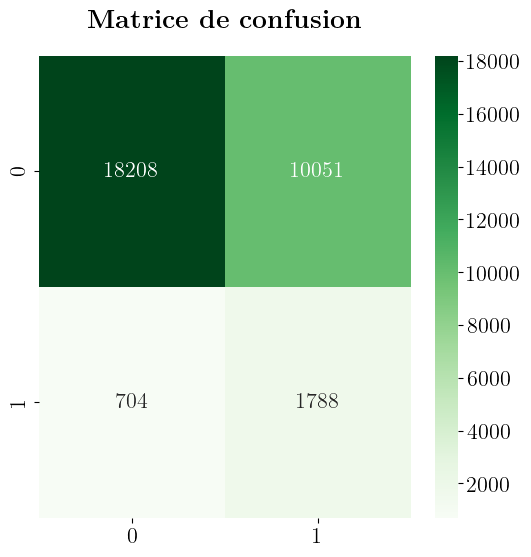

In [120]:
#on définit nos prédictions en fonction de notre nouveau seuil

y_best_pred = (y_pred_proba >= optimal_threshold).astype(int)

#on affiche quelques scores
f1_sco = f1_score(y_test, y_best_pred)
recall_sco = recall_score(y_test, y_best_pred)

print('-' * 50)
print("F1 Score :", round(f1_sco, 2))
print("Score de Rappel :", round(recall_sco, 2))
print('-' * 50)

#on affiche la matrice de confusion
plt.rc('text', usetex = True)
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_best_pred), annot = True, cmap = 'Greens', fmt = 'd')
plt.title(f"\\textbf{{Matrice de confusion}}", pad = 20)
plt.show()

## 4 - IMPORTANCE DES FEATURES
***

100%|===================| 30722/30751 [13:15<00:00]        

********************************************************************************
--------------------- Bienvenue dans la FEATURE IMPORTANCE ---------------------
________________________________________________________________________________
--------------------------------------------------------------------------------


Voulez-vous afficher le graphique de l'importance des caractéristiques ? (y/n) :  y


--------------------------------------------------------------------------------


Entrez le nombre de caractéristiques souhaitées (max 40) :  10


--------------------------------------------------------------------------------


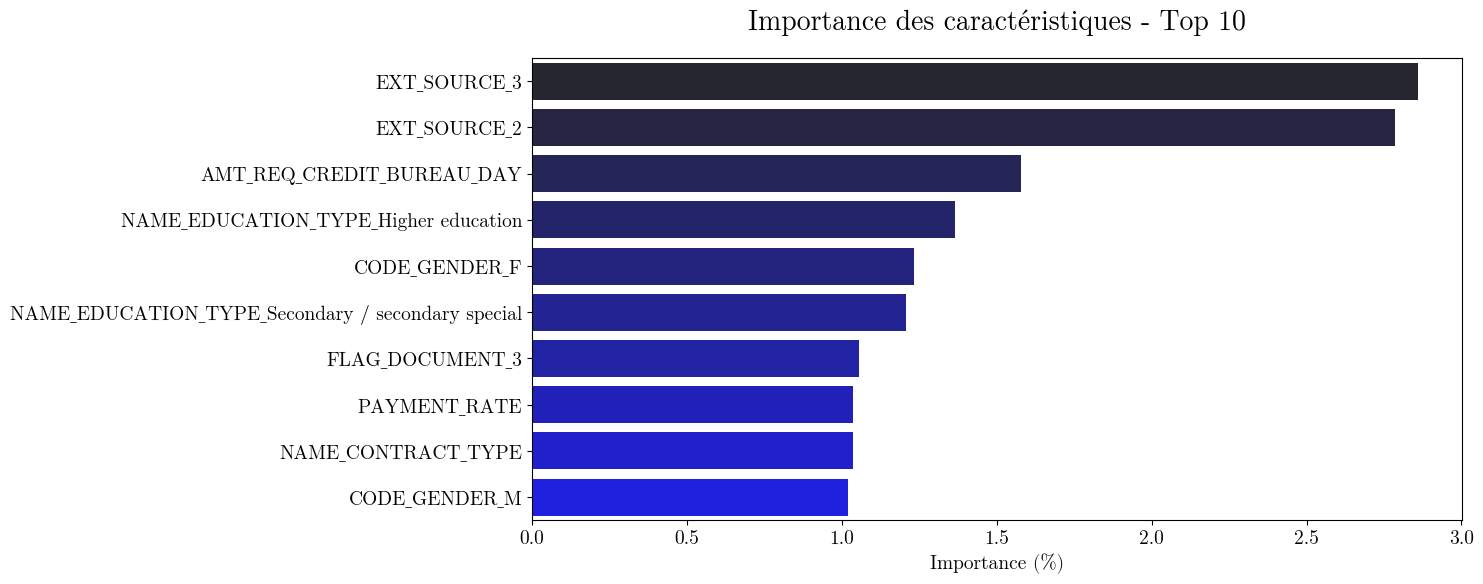

--------------------------------------------------------------------------------


Voulez vous afficher le diagramme en barre de SHAP ? (y/n) :  y


--------------------------------------------------------------------------------


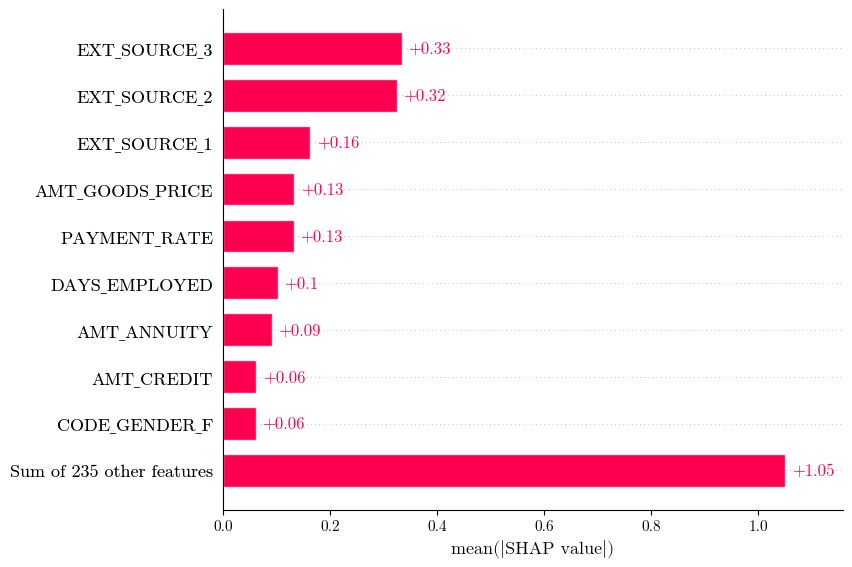

--------------------------------------------------------------------------------


Voulez vous afficher le diagramme en essaim de SHAP ? (y/n) :  y


--------------------------------------------------------------------------------


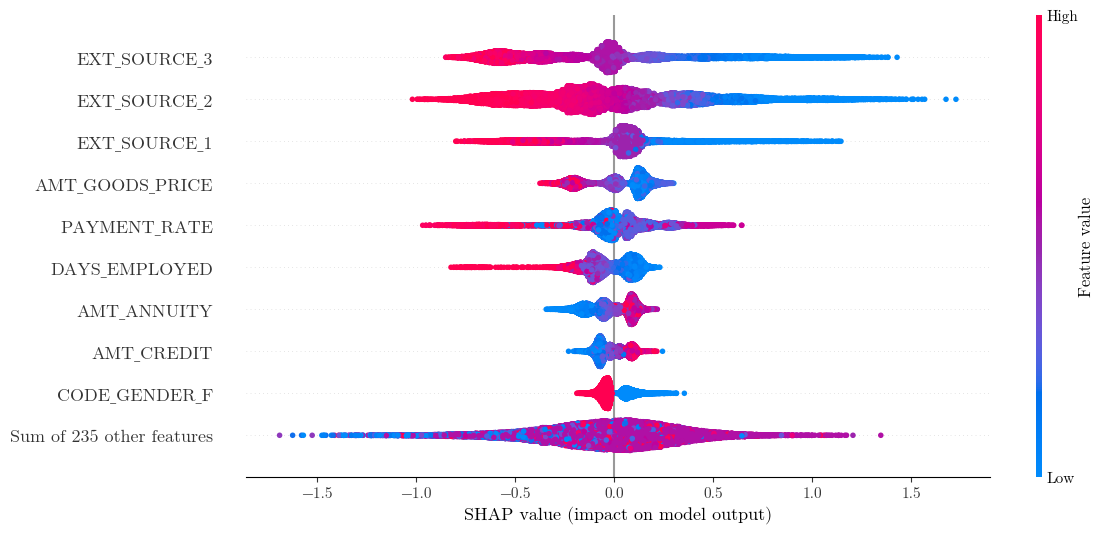

--------------------------------------------------------------------------------


Voulez-vous afficher l'importance des caractéristiques locale ? (y/n) :  y


--------------------------------------------------------------------------------


Entrez l'index de l'observation pour laquelle vous souhaitez visualiser l'importance des caractéristiques :  23


--------------------------------------------------------------------------------


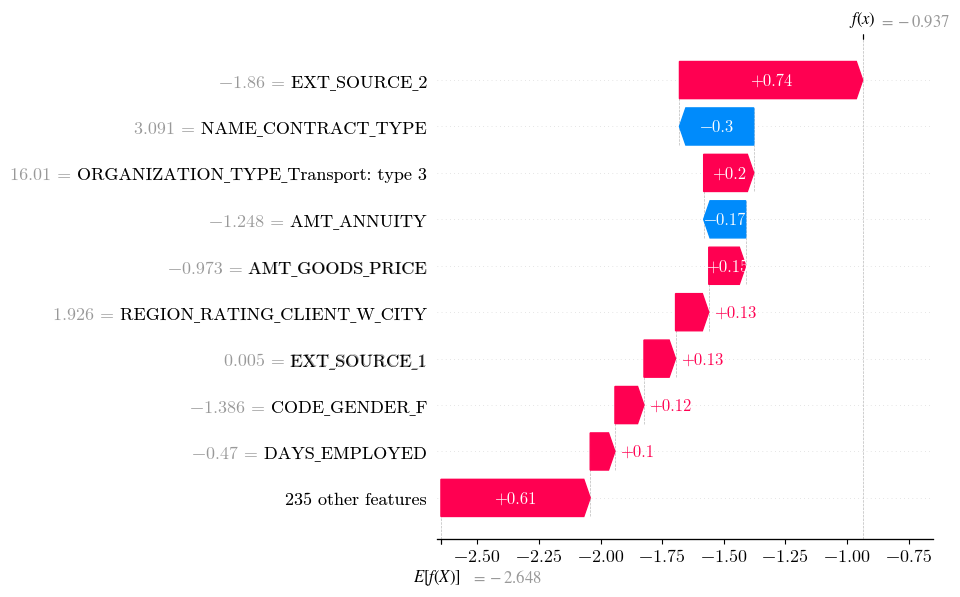

--------------------------------------------------------------------------------


In [108]:
#on affiche la feature importance

df_feature_importance, df_shap = fc.feature_importance(model, X_train_std, X_test_std, liste_colonnes, is_linear = False)

In [111]:
#on sauvegarde le dataframe shap

df_shap.to_csv('./dataframes/data_shap.csv', index = False)

In [123]:
from joblib import dump


#on sauvegarde le modèle

dump(model, './best_model/xgbclassifier.pkl')
np.save('./best_model/optimal_threshold.npy', best_threshold)

### Des essais sur le score métier

In [135]:
liste_metiers = []

for threshold in thresholds_range:
    y_pred = [1 if prob > threshold else 0 for prob in y_pred_proba]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    score_m = (fp + 10 * fn) / (tn + fp + fn + tp)
    liste_metiers.append(score_m)

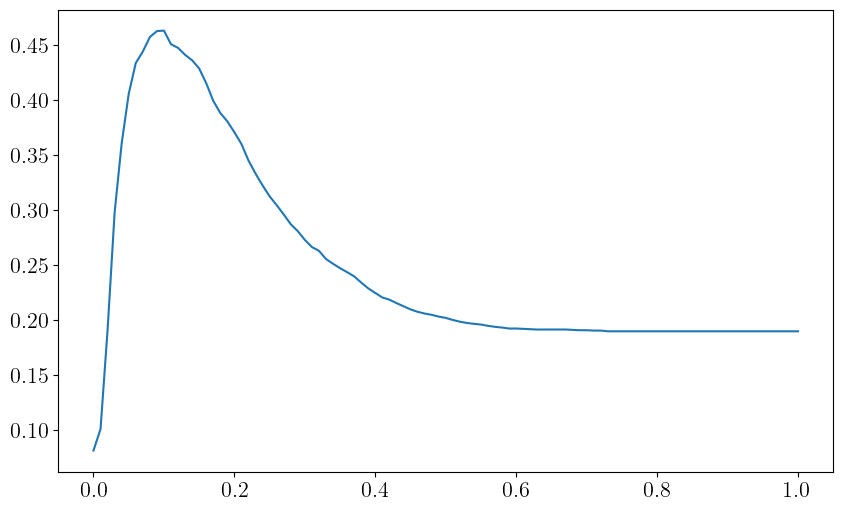

In [139]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = thresholds_range, y = [1 - score for score in liste_metiers])
plt.show()

In [137]:
df_metier = pd.DataFrame({'threshold': thresholds_range, 'score_m': liste_metiers})
df_metier.head()

,threshold,score_m
0,0.00,0.918962
1,0.01,0.899288
2,0.02,0.809177
3,0.03,0.702189
4,0.04,0.639394


In [138]:
df_metier.sort_values(by = 'score_m')

,threshold,score_m
10,0.10,0.536698
9,0.09,0.537186
8,0.08,0.542551
11,0.11,0.549120
12,0.12,0.552437
...,...,...
73,0.73,0.810380
99,0.99,0.810380
84,0.84,0.810380
1,0.01,0.899288


In [5]:
optimal_thr = np.load('./best_model/optimal_threshold.npy').item()
optimal_thr

0.08

In [7]:
df_test = pd.read_csv('../dataframes/df_test.csv')

In [8]:
df_test.shape

(48744, 245)

In [9]:
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,DAYS_EMPLOYED_ANOMALY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED_PERCENT,INCOME_CREDIT_PERCENT,INCOME_PER_PERSON,ANNUITY_INCOME_PERCENT,PAYMENT_RATE
0,100001.0,0.0,0.0,1.0,0.0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0.0,0.752614,0.789654,0.159520,19241.0,0.121044,0.237342,67500.0,0.152300,0.036147
1,100005.0,0.0,0.0,1.0,0.0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0.0,0.564990,0.291656,0.432962,18064.0,0.247398,0.444409,49500.0,0.175455,0.077973
2,100013.0,0.0,1.0,1.0,0.0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0.0,0.501180,0.699787,0.610991,20038.0,0.222477,0.305308,101250.0,0.344578,0.105202
3,100028.0,0.0,0.0,1.0,2.0,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0.0,0.525734,0.509677,0.612704,13976.0,0.133515,0.200000,78750.0,0.155614,0.031123
4,100038.0,0.0,1.0,0.0,1.0,180000.0,625500.0,32067.0,625500.0,0.010032,...,0.0,0.202145,0.425687,0.500106,13040.0,0.168021,0.287770,60000.0,0.178150,0.051266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221.0,0.0,0.0,1.0,0.0,121500.0,412560.0,17473.5,270000.0,0.002042,...,0.0,0.501180,0.648575,0.643026,19970.0,0.258838,0.294503,121500.0,0.143815,0.042354
48740,456222.0,0.0,0.0,0.0,2.0,157500.0,622413.0,31909.5,495000.0,0.035792,...,0.0,0.501180,0.684596,0.500106,11186.0,0.102718,0.253047,39375.0,0.202600,0.051267
48741,456223.0,0.0,1.0,1.0,1.0,202500.0,315000.0,33205.5,315000.0,0.026392,...,0.0,0.733503,0.632770,0.283712,15922.0,0.190742,0.642857,67500.0,0.163978,0.105414
48742,456224.0,0.0,0.0,0.0,0.0,225000.0,450000.0,25128.0,450000.0,0.018850,...,0.0,0.373090,0.445701,0.595456,13968.0,0.195518,0.500000,112500.0,0.111680,0.055840
